In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('combined_dataset.csv')
data

,HRV_ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_LnHF,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Symp,EDA_SympN,EDA_Autocorrelation,COND:,ANS_VALENCE,ANS_AROUSAL
0,71.196120,842.428571,64.762313,NaN,NaN,NaN,NaN,NaN,NaN,75.081289,...,-2.378237,9.0,1.475964e-07,1.391985e-06,2.403737e-15,0.011003,0.371942,P-,3.319,6.556
1,80.527350,753.869565,124.272174,NaN,NaN,NaN,NaN,NaN,NaN,142.655179,...,-2.561700,5.0,6.589435e-08,1.452250e-06,1.831144e-14,0.060600,0.379048,S-,3.484,6.640
2,72.622615,834.666667,134.179109,NaN,NaN,NaN,NaN,NaN,NaN,129.822186,...,-3.881288,6.0,1.004855e-07,1.153391e-06,7.505302e-15,0.010668,0.345647,S-,3.900,6.151
3,69.528205,863.250000,52.152484,NaN,NaN,NaN,NaN,NaN,NaN,51.687828,...,-3.464733,9.0,1.055702e-07,1.149684e-06,1.735793e-15,0.003700,0.358658,PS-,2.505,7.905
4,72.177567,831.380952,51.758551,NaN,NaN,NaN,NaN,NaN,NaN,55.663273,...,-3.065557,9.0,1.074753e-07,9.936350e-07,3.013457e-15,0.061096,0.378463,PS+,7.376,7.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10557,97.801199,627.888889,188.988264,NaN,NaN,NaN,NaN,NaN,NaN,211.550503,...,-2.227866,3.0,3.236122e-07,7.219344e-08,5.467817e-15,0.003663,-0.096501,P-,1.000,5.025
10558,94.860376,640.535714,120.910583,NaN,NaN,NaN,NaN,NaN,NaN,149.975554,...,-3.306196,4.0,2.131483e-07,4.487245e-08,5.710199e-15,0.016282,-0.059129,P-,1.000,5.702
10559,85.418136,712.360000,156.775817,NaN,NaN,NaN,NaN,NaN,NaN,189.233322,...,-2.223794,5.0,6.840516e-08,2.562951e-08,3.194092e-15,0.020198,-0.159260,S+,9.000,9.000
10560,87.073850,691.076923,45.783773,NaN,NaN,NaN,NaN,NaN,NaN,62.721607,...,-2.949387,6.0,7.669646e-08,9.907503e-08,5.631141e-15,0.037829,0.283445,PS+,9.000,5.000


In [3]:
cords = data.iloc[:, -2:]
cords

,ANS_VALENCE,ANS_AROUSAL
0,3.319,6.556
1,3.484,6.640
2,3.900,6.151
3,2.505,7.905
4,7.376,7.485
...,...,...
10557,1.000,5.025
10558,1.000,5.702
10559,9.000,9.000
10560,9.000,5.000


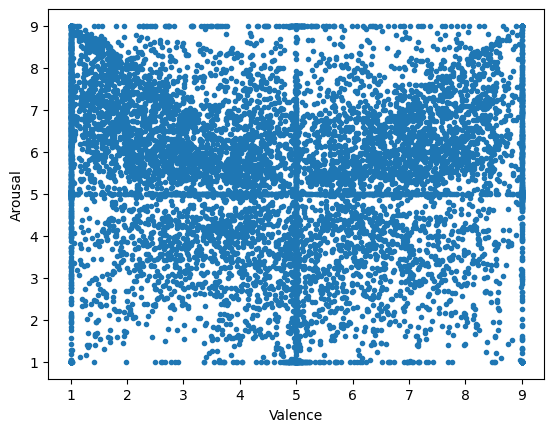

In [4]:
plt.scatter(cords['ANS_VALENCE'], cords['ANS_AROUSAL'], marker='.')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=8, init='k-means++', algorithm='lloyd', n_init=10, max_iter=300, random_state=0)
fit = kmeans.fit(cords)

In [6]:
centroids = fit.cluster_centers_
labels = fit.labels_
unique_labels = np.unique(fit.labels_)

data['LABEL'] = labels

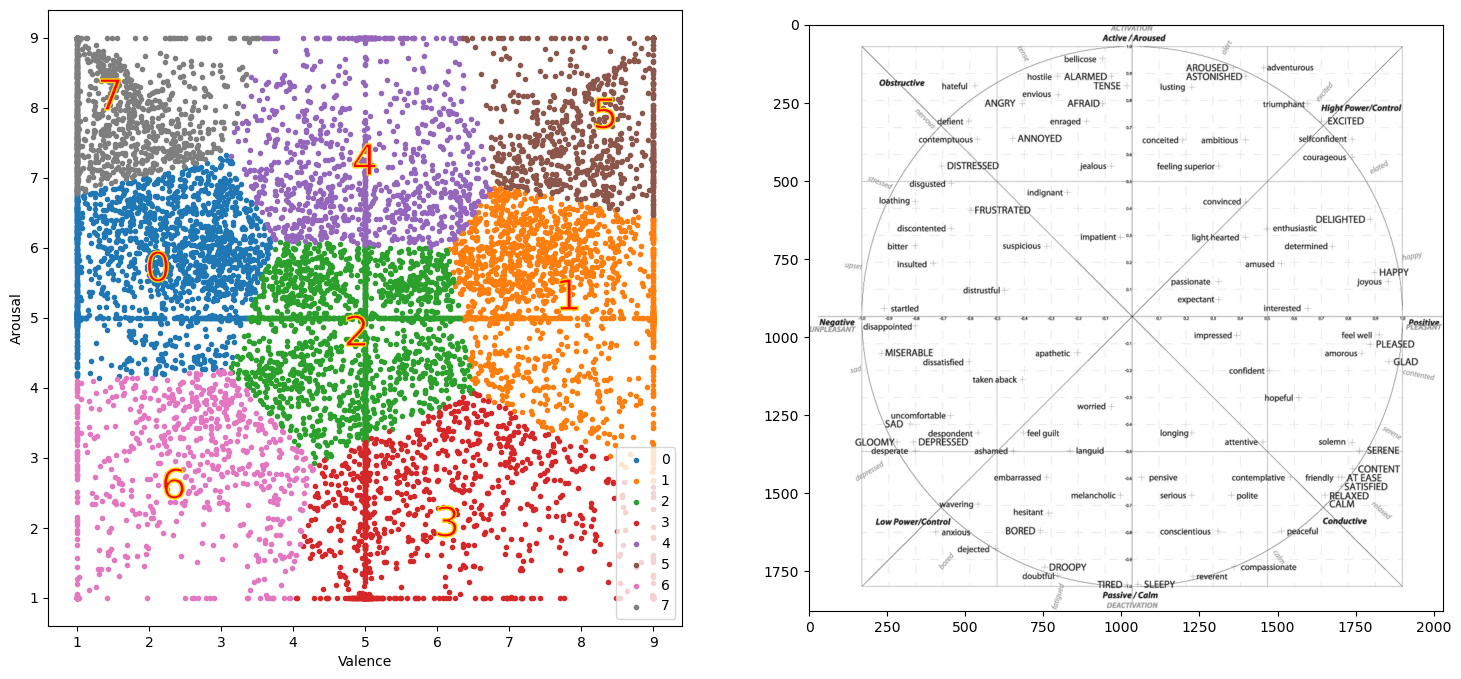

In [7]:
fig, ax = plt.subplots(1, 2, figsize=[18, 8])

for label in unique_labels:
    ax[0].scatter(data[data['LABEL'] == label]['ANS_VALENCE'], data[data['LABEL'] == label]['ANS_AROUSAL'], label=label, marker='.')
    ax[0].scatter(centroids[label][0], centroids[label][1], marker=f'${label}$', s=500, c=['red'], edgecolors=['gold'])

ax[0].set(xlabel='Valence', ylabel='Arousal')
ax[0].legend()
# https://link.springer.com/article/10.1007/s11263-019-01158-4
image = plt.imread('emotion_wheel.webp')
ax[1].imshow(image)
plt.show()

In [8]:
data.loc[data['LABEL'] == 0, 'LABEL'] = 'Disgust'
data.loc[data['LABEL'] == 1, 'LABEL'] = 'Happiness'
data.loc[data['LABEL'] == 2, 'LABEL'] = 'Neutral'
data.loc[data['LABEL'] == 3, 'LABEL'] = 'Satisfaction'
data.loc[data['LABEL'] == 4, 'LABEL'] = 'Surprise'
data.loc[data['LABEL'] == 5, 'LABEL'] = 'Excitement'
data.loc[data['LABEL'] == 6, 'LABEL'] = 'Sadness'
data.loc[data['LABEL'] == 7, 'LABEL'] = 'Anger'

In [9]:
data

,HRV_ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Symp,EDA_SympN,EDA_Autocorrelation,COND:,ANS_VALENCE,ANS_AROUSAL,LABEL
0,71.196120,842.428571,64.762313,NaN,NaN,NaN,NaN,NaN,NaN,75.081289,...,9.0,1.475964e-07,1.391985e-06,2.403737e-15,0.011003,0.371942,P-,3.319,6.556,Disgust
1,80.527350,753.869565,124.272174,NaN,NaN,NaN,NaN,NaN,NaN,142.655179,...,5.0,6.589435e-08,1.452250e-06,1.831144e-14,0.060600,0.379048,S-,3.484,6.640,Surprise
2,72.622615,834.666667,134.179109,NaN,NaN,NaN,NaN,NaN,NaN,129.822186,...,6.0,1.004855e-07,1.153391e-06,7.505302e-15,0.010668,0.345647,S-,3.900,6.151,Surprise
3,69.528205,863.250000,52.152484,NaN,NaN,NaN,NaN,NaN,NaN,51.687828,...,9.0,1.055702e-07,1.149684e-06,1.735793e-15,0.003700,0.358658,PS-,2.505,7.905,Anger
4,72.177567,831.380952,51.758551,NaN,NaN,NaN,NaN,NaN,NaN,55.663273,...,9.0,1.074753e-07,9.936350e-07,3.013457e-15,0.061096,0.378463,PS+,7.376,7.485,Excitement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10557,97.801199,627.888889,188.988264,NaN,NaN,NaN,NaN,NaN,NaN,211.550503,...,3.0,3.236122e-07,7.219344e-08,5.467817e-15,0.003663,-0.096501,P-,1.000,5.025,Disgust
10558,94.860376,640.535714,120.910583,NaN,NaN,NaN,NaN,NaN,NaN,149.975554,...,4.0,2.131483e-07,4.487245e-08,5.710199e-15,0.016282,-0.059129,P-,1.000,5.702,Disgust
10559,85.418136,712.360000,156.775817,NaN,NaN,NaN,NaN,NaN,NaN,189.233322,...,5.0,6.840516e-08,2.562951e-08,3.194092e-15,0.020198,-0.159260,S+,9.000,9.000,Excitement
10560,87.073850,691.076923,45.783773,NaN,NaN,NaN,NaN,NaN,NaN,62.721607,...,6.0,7.669646e-08,9.907503e-08,5.631141e-15,0.037829,0.283445,PS+,9.000,5.000,Happiness


In [10]:
data.to_csv('labeled_8_combined_dataset.csv')

In [12]:
data = pd.read_csv('combined_dataset.csv')
data

,HRV_ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_LnHF,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Symp,EDA_SympN,EDA_Autocorrelation,COND:,ANS_VALENCE,ANS_AROUSAL
0,71.196120,842.428571,64.762313,NaN,NaN,NaN,NaN,NaN,NaN,75.081289,...,-2.378237,9.0,1.475964e-07,1.391985e-06,2.403737e-15,0.011003,0.371942,P-,3.319,6.556
1,80.527350,753.869565,124.272174,NaN,NaN,NaN,NaN,NaN,NaN,142.655179,...,-2.561700,5.0,6.589435e-08,1.452250e-06,1.831144e-14,0.060600,0.379048,S-,3.484,6.640
2,72.622615,834.666667,134.179109,NaN,NaN,NaN,NaN,NaN,NaN,129.822186,...,-3.881288,6.0,1.004855e-07,1.153391e-06,7.505302e-15,0.010668,0.345647,S-,3.900,6.151
3,69.528205,863.250000,52.152484,NaN,NaN,NaN,NaN,NaN,NaN,51.687828,...,-3.464733,9.0,1.055702e-07,1.149684e-06,1.735793e-15,0.003700,0.358658,PS-,2.505,7.905
4,72.177567,831.380952,51.758551,NaN,NaN,NaN,NaN,NaN,NaN,55.663273,...,-3.065557,9.0,1.074753e-07,9.936350e-07,3.013457e-15,0.061096,0.378463,PS+,7.376,7.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10557,97.801199,627.888889,188.988264,NaN,NaN,NaN,NaN,NaN,NaN,211.550503,...,-2.227866,3.0,3.236122e-07,7.219344e-08,5.467817e-15,0.003663,-0.096501,P-,1.000,5.025
10558,94.860376,640.535714,120.910583,NaN,NaN,NaN,NaN,NaN,NaN,149.975554,...,-3.306196,4.0,2.131483e-07,4.487245e-08,5.710199e-15,0.016282,-0.059129,P-,1.000,5.702
10559,85.418136,712.360000,156.775817,NaN,NaN,NaN,NaN,NaN,NaN,189.233322,...,-2.223794,5.0,6.840516e-08,2.562951e-08,3.194092e-15,0.020198,-0.159260,S+,9.000,9.000
10560,87.073850,691.076923,45.783773,NaN,NaN,NaN,NaN,NaN,NaN,62.721607,...,-2.949387,6.0,7.669646e-08,9.907503e-08,5.631141e-15,0.037829,0.283445,PS+,9.000,5.000


In [17]:
kmeans = KMeans(n_clusters=6, init='k-means++', algorithm='lloyd', n_init=10, max_iter=300, random_state=0)
fit = kmeans.fit(cords)

In [18]:
centroids = fit.cluster_centers_
labels = fit.labels_
unique_labels = np.unique(fit.labels_)

data['LABEL'] = labels

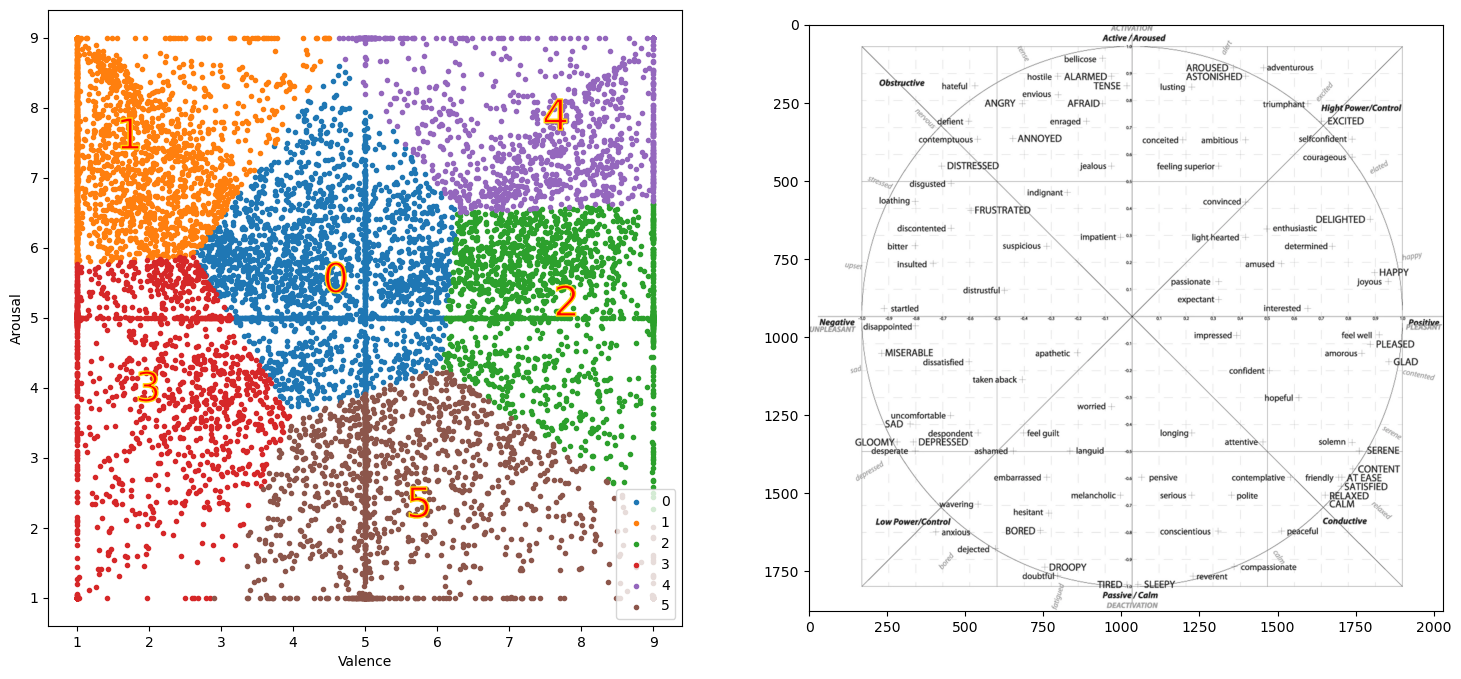

In [19]:
fig, ax = plt.subplots(1, 2, figsize=[18, 8])

for label in unique_labels:
    ax[0].scatter(data[data['LABEL'] == label]['ANS_VALENCE'], data[data['LABEL'] == label]['ANS_AROUSAL'], label=label, marker='.')
    ax[0].scatter(centroids[label][0], centroids[label][1], marker=f'${label}$', s=500, c=['red'], edgecolors=['gold'])

ax[0].set(xlabel='Valence', ylabel='Arousal')
ax[0].legend()
# https://link.springer.com/article/10.1007/s11263-019-01158-4
image = plt.imread('emotion_wheel.webp')
ax[1].imshow(image)
plt.show()

In [20]:
data.loc[data['LABEL'] == 0, 'LABEL'] = 'Neutral'
data.loc[data['LABEL'] == 1, 'LABEL'] = 'Anger'
data.loc[data['LABEL'] == 2, 'LABEL'] = 'Happiness'
data.loc[data['LABEL'] == 3, 'LABEL'] = 'Sadness'
data.loc[data['LABEL'] == 4, 'LABEL'] = 'Excitement'
data.loc[data['LABEL'] == 5, 'LABEL'] = 'Satisfaction'

In [21]:
data.to_csv('labeled_6_combined_dataset.csv')